Установка используемой библиотеки с алгоритмом Apriori

In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=1d16078aee43f8f14b339286e4a06af7241f4f2d1869cb48478411c0272973c5
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


Импорт необходимых библиотек

In [ ]:
import time
import pandas as pd
import apyori
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

Выбираем файл



In [ ]:
uploaded = files.upload()

Saving baskets.csv to baskets.csv


Для загрузки датасета нужен метод pd.read_csv. Это метод библиотеки pandas   
Необходимо указать тот датасет, который был загружен выше

In [ ]:
from IPython.core.interactiveshell import Unicode
dataset = pd.read_csv('baskets.csv', encoding='cp1251', header = None)

Если у method установлено значение 'ffill'. Замена отсутвующих элементов допустимыми значениями
inplace=True, сам исходный объект обновляется, если для axis аргумента задано значение 1, отсутствующие значения заменяются левым и правым значениями.

In [ ]:
dataset.fillna(method = 'ffill', axis = 1, inplace = True) # Имеет тип данных <class 'pandas.core.frame.DataFrame'>
dataset.shape

<ipython-input-8-32e3fe99a62f>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method = 'ffill', axis = 1, inplace = True) # Имеет тип данных <class 'pandas.core.frame.DataFrame'>


(7501, 20)

Создание массива транзакций. Т.е. таблицу выстраиваем в строку

In [ ]:
transactions = []
for i in range(0, 7500):
 transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

Применение алгоритма; запись времени работы и количества частых наборов

In [ ]:
sups = [0.05, 0.1, 0.15, 0.20, 0.25] # Коэффициент поддержки 5%, 10%, 15%, 20%, 25%.

times, rules, results = [], [], []

for sup in sups:
    start = time.time()
    # min_support = 0.03 - фиксированная поддержка в 3%, min_confidence = sup - подставляем значения достоверности
    result = list(apyori.apriori(transactions = transactions, min_support = 0.03, min_confidence = sup))
    end = time.time()

    rules.append(len(result))
    times.append(end - start)
    results.append(result)

In [ ]:
print('Время работы алгоритма:', times) # Вывод времени для каждой поддержки
print('Количество наборов:', rules) #Пример- коефф. 0,01, время - 0.12682485580444336, кол-во наборов - 260

Время работы алгоритма: [0.0275266170501709, 0.025728940963745117, 0.024949312210083008, 0.022866010665893555, 0.03321242332458496]
Количество наборов: [44, 26, 24, 18, 9]


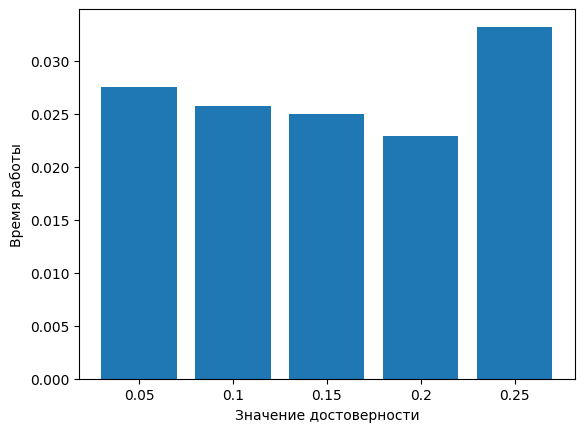

In [ ]:
s = []
for i in sups:
    s.append(str(i))

plt.bar(s, times)
plt.xlabel("Значение достоверности")
plt.ylabel("Время работы")
plt.show()

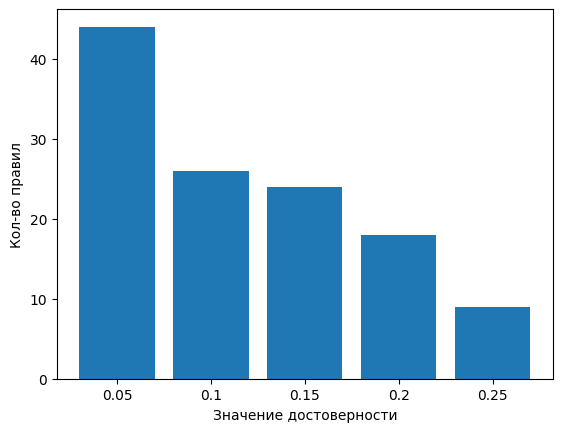

In [ ]:
plt.bar(s, rules)
plt.xlabel("Значение достоверности")
plt.ylabel("Кол-во правил")
plt.show()

In [ ]:
result_rules = list(apyori.apriori(transactions = transactions, min_support = 0.03, min_confidence = sup)) # Ассоциативные правила
result_rules

[RelationRecord(items=frozenset({'блинчики', 'минеральная вода'}), support=0.03373333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'блинчики'}), items_add=frozenset({'минеральная вода'}), confidence=0.3548387096774194, lift=1.4884174063650142)]),
 RelationRecord(items=frozenset({'макароны', 'говяжий фарш'}), support=0.040266666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({'говяжий фарш'}), items_add=frozenset({'макароны'}), confidence=0.40976933514246944, lift=2.179624123098242)]),
 RelationRecord(items=frozenset({'минеральная вода', 'говяжий фарш'}), support=0.040933333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'говяжий фарш'}), items_add=frozenset({'минеральная вода'}), confidence=0.41655359565807326, lift=1.7472885723912468)]),
 RelationRecord(items=frozenset({'замороженные овощи', 'минеральная вода'}), support=0.03573333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'замороженные овощи

In [ ]:
def inspect(results):# Формируем удобочитаемый вывод ассоциативных правил
    lhs         =[tuple(result[2][0][0])[0] for result in results]
    rhs         =[tuple(result[2][0][1])[0] for result in results]
    supports    =[result[1] for result in results]
    confidences =[result[2][0][2] for result in results]
    lifts        =[result[2][0][3] for result in results]
    return list (zip(lhs, rhs, supports, confidences))
resultsinDataFrame = pd.DataFrame(inspect(result), columns = ["Антецедент", "Консеквент", "Поддержка", "Достоверность"])

Выводим правила отсортированные по "Достоверность". Кол-во правил соотвествует наибольшему значению достоверности

In [ ]:
resultsinDataFrame.nlargest(n=20, columns = "Достоверность")

,Антецедент,Консеквент,Поддержка,Достоверность
2,говяжий фарш,минеральная вода,0.040933,0.416554
1,говяжий фарш,макароны,0.040267,0.409769
3,замороженные овощи,минеральная вода,0.035733,0.374825
6,молоко,минеральная вода,0.048000,0.370370
0,блинчики,минеральная вода,0.033733,0.354839
4,макароны,минеральная вода,0.061200,0.325532
7,шоколад,минеральная вода,0.052667,0.321400
5,молоко,макароны,0.036933,0.284979
8,яйца,минеральная вода,0.050933,0.283593
